In [48]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.colors as mcolors
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

with open('input.json', 'r') as inputFile:
    datas = json.load(inputFile)
    datas = {key:np.array(data) for key, data in datas.items()}
x1, y1 = datas['x1'], datas['y1']
x2, y2 = datas['x2'], datas['y2']
x3, y3 = datas['x3'], datas['y3']

AttributeError: 'Ellipse' object has no property 'cmap'

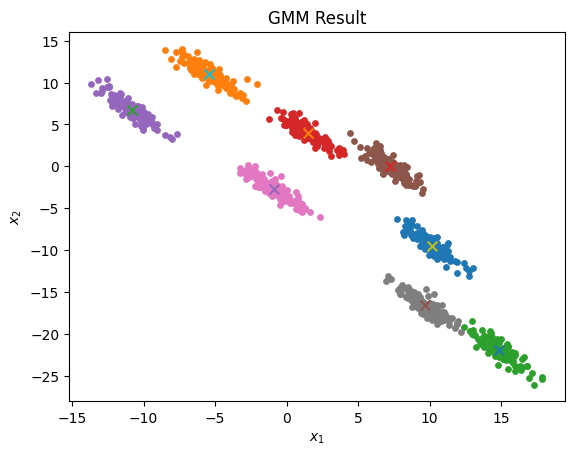

In [49]:
import matplotlib as mpl
from sklearn.mixture import GaussianMixture as GMM
colors = list(mpl.colormaps.values())
class GMM_predictor(object):
    def __init__(self, x: np.ndarray, y: np.ndarray):
        self.x = x
        self.y = y
        self.classes = np.unique(self.y)
        self.num_class = len(self.classes)
        self.colors = colors[:self.num_class]
        self.gmm_ = None
    def draw_points(self, x, y, title=''):
        plt.figure()
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        if title != '':
            plt.title(title)
        classes = np.unique(y)
        for c_idx, c in enumerate(classes):
            target = x[y == c,:]
            x1 = target[:, 0]
            x2 = target[:, 1]
            plt.scatter(x1, x2, cmap=self.colors[c_idx], s=15, label="Class {}".format(c))


        w_factor = 0.2 / self.gmm_.weights_.max()
        for c_idx, center in enumerate(self.gmm_.means_):
            plt.scatter(center[0], center[1], marker='x', s=50)

        # print(self.gmm_.covariances_.shape)
        for c_idx, (pos, covar, w) in enumerate(zip(self.gmm_.means_, self.gmm_.covariances_, self.gmm_.weights_)):
            draw_ellipse(pos, covar, alpha=w * w_factor, cmap=self.colors[c_idx])

        plt.legend()
        plt.show()
    def gmm_predict(self, max_iter:int=100, covariance_type:float='full', tol:float=1e-3):
        self.gmm_ = GMM(n_components=self.num_class,
                    covariance_type=covariance_type,
                    max_iter=max_iter, 
                    tol=tol)
        self.gmm_ = self.gmm_.fit(self.x)
        predict_y = self.gmm_.predict(self.x)
        self.draw_points(self.x , predict_y, 'GMM Result')


gmm = GMM_predictor(x3, y3)
# gmm.draw_points(x3, y3, 'Origin')
gmm.gmm_predict(max_iter=10)
# gmm = GMM_predictor(x2, y2)
# gmm.draw_points()
# gmm = GMM_predictor(x3, y3)
# gmm.draw_points()